# Recomender Systems
**Recommender systems aim to predict users’ interests and recommend product items that quite likely are interesting for them**

###### There are two types of recomender Systems

* Contents Based : Filtering on basis of items
* Recomed items with similarty in Attributes**
**Collabarative Based : Filtering on basis of users knowledge
Recomend item by analysing the other people behaviour
CF is More Commonly used In Recomendation Systems becuse of better performance and accuracy**

In [1]:
import numpy as np
import pandas as pd

In [2]:
col=['user_id','item_id','ratings','timestamp']

In [3]:
df=pd.read_csv('u.data',sep='\t',names=col,)

In [4]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_title=pd.read_csv('Movie_Id_Titles')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [27]:
df.drop('title',axis=1,inplace=True)
df=pd.merge(df,movie_title,on='item_id')
df.head()

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   ratings    100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
ratings=df.groupby('title')['ratings'].mean().sort_values(ascending=False).reset_index()
ratings.head()

,title,ratings
0,Marlene Dietrich: Shadow and Light (1996),5.0
1,Prefontaine (1997),5.0
2,Santa with Muscles (1996),5.0
3,Star Kid (1997),5.0
4,Someone Else's America (1995),5.0


In [32]:
audience=df.groupby('title')['ratings'].count().sort_values(ascending=False).reset_index()
audience.head()

,title,ratings
0,Star Wars (1977),584
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485


#### There is a chance movies with High Ratings have low count of watchers 

In [33]:
audience[audience['title']=='Star Kid (1997)']['ratings']

1416    3
Name: ratings, dtype: int64

In [34]:
rat_aud=pd.merge(d1,d2,on='title')

In [35]:
rat_aud.columns=['title','Average_rat','Number_of_rat']

In [36]:
rat_aud.head()

,title,Average_rat,Number_of_rat
0,Marlene Dietrich: Shadow and Light (1996),5.0,1
1,Prefontaine (1997),5.0,3
2,Santa with Muscles (1996),5.0,2
3,Star Kid (1997),5.0,3
4,Someone Else's America (1995),5.0,1


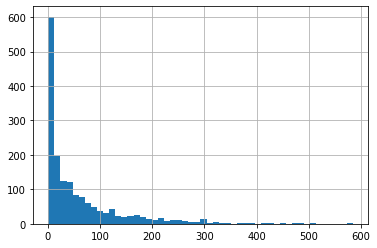

In [15]:
rat_aud['Number_of_rat'].hist(bins=50)

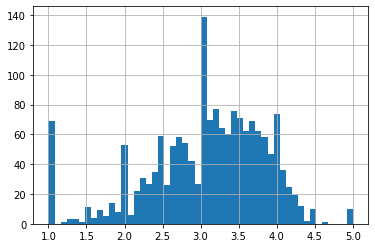

In [16]:
rat_aud['Average_rat'].hist(bins=50)

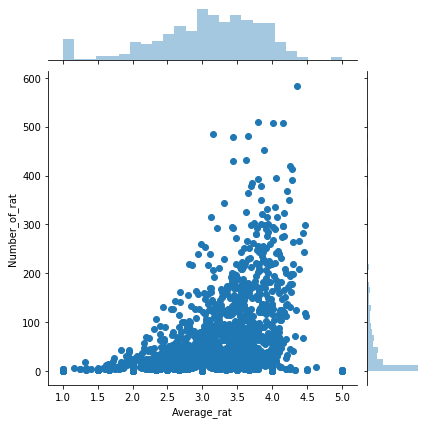

In [17]:
sns.jointplot(x='Average_rat',y='Number_of_rat',data=rat_aud)

In [37]:
user_watch=df.pivot_table(index='user_id',columns='title',values='ratings')

In [38]:
user_watch.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
rat_aud[rat_aud['Number_of_rat']>100][['title','Average_rat']].sort_values('Average_rat',ascending=False).head(10)

,title,Average_rat
15,"Close Shave, A (1995)",4.491071
16,Schindler's List (1993),4.466443
17,"Wrong Trousers, The (1993)",4.466102
18,Casablanca (1942),4.456790
20,"Shawshank Redemption, The (1994)",4.445230
21,Rear Window (1954),4.387560
22,"Usual Suspects, The (1995)",4.385768
23,Star Wars (1977),4.359589
24,12 Angry Men (1957),4.344000
28,Citizen Kane (1941),4.292929


In [45]:
Close_Shave_rat= user_watch['Close Shave, A (1995)'] # A Series 

In [46]:
Rear_Window_rat= user_watch['Rear Window (1954)']  # A Series

#  Corrwith Method
**When you want to compute the Corr of One Series with rest of DataFrame** 

In [53]:
similar_to_Close_Shave=user_watch.corrwith(Close_Shave_rat)
;

''

In [56]:
similar_to_Rear_Window=user_watch.corrwith(Rear_Window_rat)
similar_to_Close_Shave.head(5)

title
'Til There Was You (1997)   -1.000000
1-900 (1994)                 1.000000
101 Dalmatians (1996)       -0.144924
12 Angry Men (1957)         -0.141596
187 (1997)                   0.705534
dtype: float64

### Lets Convert the Results Into DataFrame 

In [60]:
result1=pd.DataFrame(similar_to_Close_Shave,columns=['Correaltion']).reset_index()

In [61]:
result1.head(5)

,title,Correaltion
0,'Til There Was You (1997),-1.000000
1,1-900 (1994),1.000000
2,101 Dalmatians (1996),-0.144924
3,12 Angry Men (1957),-0.141596
4,187 (1997),0.705534


In [62]:
result2=pd.DataFrame(similar_to_Rear_Window,columns=['Correaltion']).reset_index()

In [63]:
result2.head(5)

,title,Correaltion
0,'Til There Was You (1997),1.000000
1,1-900 (1994),1.000000
2,101 Dalmatians (1996),0.146230
3,12 Angry Men (1957),0.570513
4,187 (1997),0.399275


In [65]:
result1.sort_values("Correaltion",ascending=False).dropna()

,title,Correaltion
1,1-900 (1994),1.0
186,Bliss (1997),1.0
648,Hackers (1995),1.0
1548,Two Bits (1995),1.0
629,"Grass Harp, The (1995)",1.0
...,...,...
742,In the Realm of the Senses (Ai no corrida) (1976),-1.0
426,"Doom Generation, The (1995)",-1.0
1115,"Pagemaster, The (1994)",-1.0
1092,"Old Man and the Sea, The (1958)",-1.0


### Finally we Got the  Movies that we can 